## Neural Networks
In an artificial neural network, you have $n$ inputs connected to $k$ hidden neurons by a matrix $W$.

$$
\begin{bmatrix}
    h_1^\prime & h_2^\prime & h_3^\prime
\end{bmatrix} = 
\begin{bmatrix}
    x_1 & x_2 & x_3 & \dots & x_n
\end{bmatrix}\cdot
\begin{bmatrix}
    W_{11} & W_{12} & W_{13} \\
    W_{21} & W_{22} & W_{23} \\
    W_{31} & W_{32} & W_{33} \\
    \vdots & \vdots & \vdots \\
    W_{n1} & W_{n2} & W_{n3}
\end{bmatrix}
$$

To make sure that values don't "explode," we use an **activation function** $\phi$ to wrap the matrix calculation.

$\vec{h} = \phi(\vec{x}W^1) = \phi(\vec{h^\prime})$

If $n = 5$, the network can be visualized as below:

![network](./nnetwork.png)


Diagram generated by [simple script](Simple%20Neural%20Network%20Visualizer.ipynb)

A linear boundary is defined by:
$W_1x_1 + W_2x_2 + b = 0$ or  $\textbf{Wx} + b = 0$

Prediction:

$$
\hat{y} = \begin{cases}
    1 \enspace if \enspace \textbf{Wx} + b \geq 0 \\
    0 \enspace if \enspace \textbf{Wx} + b < 0
    \end{cases}
$$

### Perceptron


$$
\textbf{Wx} + b = \sum_{i=0}^{n}W_ix_i + b
$$

Is the result $\geq$ 0? If so, return 1. If not, return 0. This is called a _step function_.

### XOR

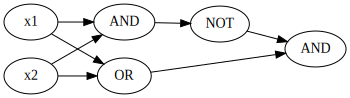

In [82]:
from graphviz import Digraph

dot = Digraph(comment='XOR')
dot.attr(rankdir='LR')
dot.node('A', 'x1')
dot.node('B', 'x2')
dot.node('C', 'AND')
dot.node('D', 'NOT')
dot.node('E', 'OR')
dot.node('Z', 'AND')

dot.edges(['AC', 'AE', 'BC', 'BE', 'CD', 'EZ', 'DZ'])


dot


## Learning Rate and Perceptrons

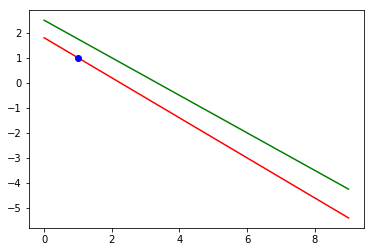

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10)
# Original
plt.plot(x, [-.25*(3*x1 - 10) for x1 in x],'g-')
# Perceptron trick: add .1 to x1, x2 and bias
plt.plot(x, [-.2*(4*x1 - 9) for x1 in x],'r-')
# You would have to apply the trick 10x to get to the point
plt.plot(1,1,'bo');

### Training

The result is quite beautiful.
<img src='./perceptron_algorithm.png' width="400px"/>

## Discrete vs. Continuous

Sigmoid function

$\sigma = \displaystyle\frac{1}{1 + e^{-x}}$

If the score is defined by $4x_1 + 5x_2 - 9 = score$, then which of the following points has exactly a 50% probability of being blue or red? (Choose all that are correct.)

<ol>
    <li>(1,1)</li>
    <li>(2,4)</li>
    <li>(5,-5)</li>
    <li>(-4,5)</li>
</ol>


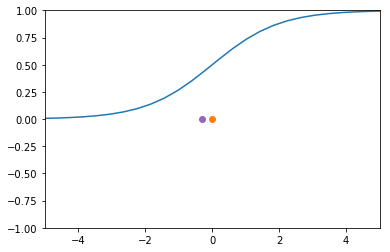

In [69]:
# import math
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,10)
# Sigmoid function
y = [1/(1 + math.exp(-x)) for x in x]
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.plot(x,y)
a1 = np.array([4,5,-9]) # Coefficients of the linear equation
inputs = [(1,1),(2,4),(5,-5),(-4,5)]
for idx, i in enumerate(inputs):
    plt.plot(0-(idx*.2)/2,np.matmul(a1,[i[0], i[1], 1]),'o')

Recall that probability is defined by distance from the line. So if the distance is .5, we will be looking for points that equal 0 or 1.

$\hat{y} = \sigma(\boldsymbol{Wx} + b)$

## Softmax Function


To consider more than two possibilities, you need the softmax function. For linear function scores $Z_i \dots Z_n$:

$$
\displaystyle P(\text{class k}) = \frac{e^{Z_k}}{\sum_{i=1}^n e^{Z_i}}
$$

In [77]:
# Implementation of softmax function

def softmax(L):
    s = sum(np.exp(L))
    return [np.exp(l)/s for l in L]